In [1]:
import numpy as np
from Turbinen_class_file import Francis_Turbine
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
%matplotlib widget

#importing pressure conversion function
import sys
import os
current = os.path.dirname(os.path.realpath('messy.ipynb'))
parent = os.path.dirname(current)
sys.path.append(parent)
from functions.pressure_conversion import pressure_conversion


In [2]:
Q_nenn = 0.85
p_nenn = pressure_conversion(10.6,'bar','Pa')
Untertweng1 = Francis_Turbine(Q_nenn,p_nenn)

In [3]:
n_p = 201
n_LA = 201

ps = np.linspace(0,2*Untertweng1.p_n,n_p,endpoint=True)
LAs = np.linspace(0,1,n_LA,endpoint=True)

Text(0.5, 0, 'Q [m³/s]')

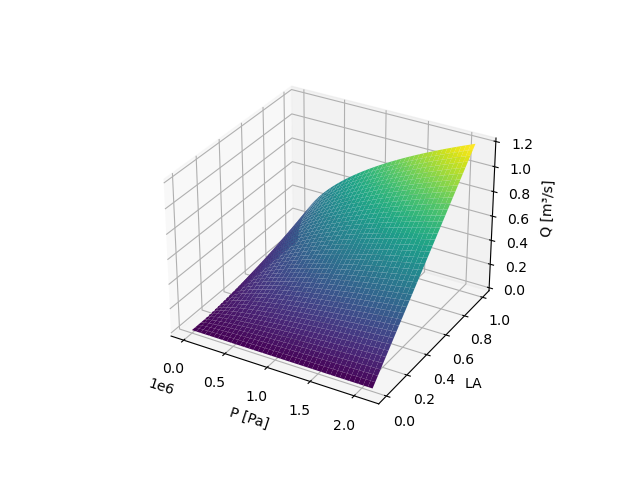

In [20]:
Q_mat = np.empty([n_LA,n_p])

pp,ll = np.meshgrid(ps,LAs)

for i in range(n_p):
    for j in range(n_LA):
        Untertweng1.set_pressure(pp[i,j])
        Untertweng1.set_LA(ll[i,j])
        Q_mat[i,j] = Untertweng1.get_Q()

fig1 = plt.figure()
ax1 = plt.axes(projection='3d')

ax1.plot_surface(pp, ll, Q_mat,cmap='viridis', edgecolor='none')
ax1.set_xlabel('P [Pa]')
ax1.set_ylabel('LA')
ax1.set_zlabel('Q [m³/s]')


C:\Users\BRANT\AppData\Local\Temp\9\ipykernel_7508\1599598770.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()


(0.0, 1.275)

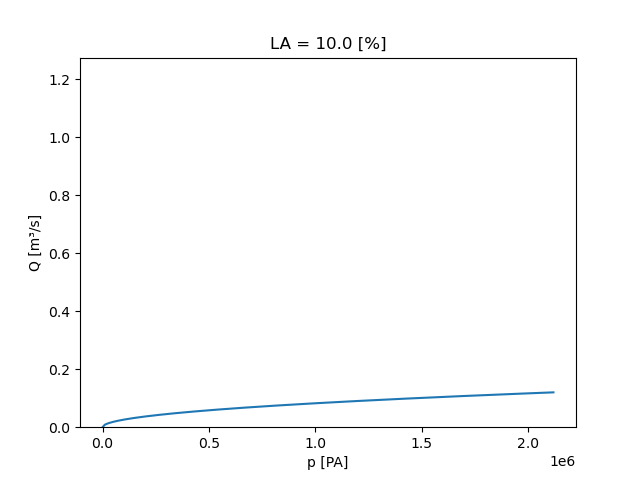

In [27]:
LA_test = 0.1
LA_index = int(np.argmin(abs(LAs-LA_test)))
LA_test2 = LAs[LA_index]

fig = plt.figure()
plt.plot(ps,Q_mat[LA_index,:])
plt.xlabel('p [PA]')
plt.ylabel('Q [m³/s]')
plt.title('LA = '+ str(100*LA_test2) + ' [%]')
plt.ylim([0,1.5*Q_nenn])

(0.0, 1.275)

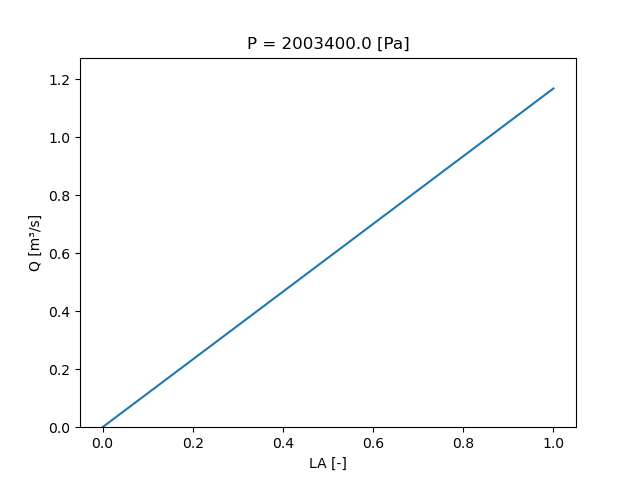

In [30]:
p_test = pressure_conversion(20.,'bar','Pa')
p_index = int(np.argmin(abs(ps-p_test)))
p_test2 = ps[p_index]

fig = plt.figure()
plt.plot(LAs,Q_mat[:,p_index])
plt.xlabel('LA [-]')
plt.ylabel('Q [m³/s]')
plt.title('P = '+ str(p_test2) + ' [Pa]')
plt.ylim([0,1.5*Q_nenn])

In [14]:
print(pp[10,5])

53000.0
